# Linear Regression Models

In [56]:
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [57]:
#Instantiate LR Model
model = LinearRegression()

In [58]:
#Sees max revenue
df_1['Revenue'].max()

2787965087.0

In [59]:
#Set new dataframe with columns I'll be using
df_2 = df_1[['Title', 'Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Revenue', 'Season Released']]
df_2.head()

,Title,Popularity,Budget,Runtime,Vote Average,Vote Count,Revenue,Season Released
0,Toy Story,21.946943,30000000.0,81.0,7.7,5415.0,373554033.0,4.0
1,Jumanji,17.015539,65000000.0,104.0,6.9,2413.0,262797249.0,1.0
3,Waiting to Exhale,3.859495,16000000.0,127.0,6.1,34.0,81452156.0,1.0
4,Father of the Bride Part II,8.387519,0.0,106.0,5.7,173.0,76578911.0,1.0
5,Heat,17.924927,60000000.0,170.0,7.7,1886.0,187436818.0,1.0


In [61]:
#Checks for nulls in dataframe
df_2.isnull().sum()

Title              0
Popularity         0
Budget             0
Runtime            0
Vote Average       0
Vote Count         0
Revenue            0
Season Released    0
dtype: int64

In [62]:
#Prints before and after shape to confirm nulls dropped
print(df_2.shape)
df_2.dropna(subset=['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released', 'Revenue'] , inplace = True)
print(df_2.shape)

(7190, 8)
(7190, 8)


C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
#Confirms no nulls in dataframe
df_2.isnull().sum()

Title              0
Popularity         0
Budget             0
Runtime            0
Vote Average       0
Vote Count         0
Revenue            0
Season Released    0
dtype: int64

In [64]:
#List of columns in dataframe
df_2.columns

Index(['Title', 'Popularity', 'Budget', 'Runtime', 'Vote Average',
       'Vote Count', 'Revenue', 'Season Released'],
      dtype='object')

In [65]:
#Set variables
#Budget	Popularity	Revenue	Runtime	Vote Average	Vote Count
X = df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released']]
y = df_2['Revenue']

In [66]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
#Confirms data types all numeric in dataframe
df_2.dtypes

Title               object
Popularity         float64
Budget             float64
Runtime            float64
Vote Average       float64
Vote Count         float64
Revenue            float64
Season Released    float64
dtype: object

In [68]:
#Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
#Gets score of model on training set
model.score(X_train, y_train)

0.7206629089444001

In [70]:
#Set Predctions and get model score
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.7336473341386798

In [71]:
#Gets model intercept
model.intercept_

2493747.85640648

In [72]:
#Gets model coefficients
model.coef_

array([ 1.16808312e+06,  1.61799197e+00, -1.02631992e+04, -1.28703371e+06,
        6.28596075e+04, -2.54216902e+06])

Text(0, 0.5, 'Actual')

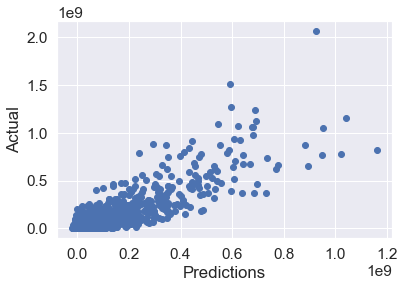

In [73]:
#Plot
import matplotlib.pyplot as plt
plt.scatter(y_predict, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

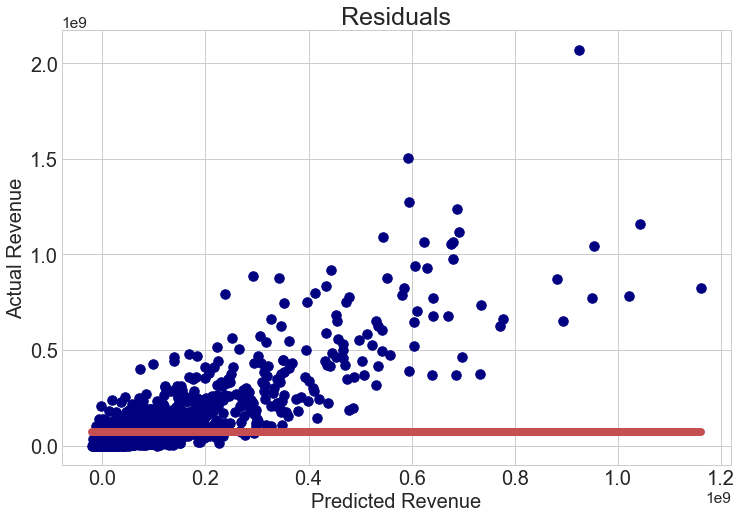

In [74]:
plt.figure(figsize = (12,8))
plt.style.use('seaborn-whitegrid')
plt.scatter(y_predict,y_test,c='navy',s=90);
plt.plot((np.min(y_predict), np.max(y_predict)),
        (np.mean(y_test), np.mean(y_test)),
       color='r',linewidth=8);

plt.title("Residuals",fontsize=25)
plt.xlabel("Predicted Revenue",fontsize=20)
plt.ylabel("Actual Revenue",fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 41149627.95438364
Mean Squared Error: 6503735731547991.0
Root Mean Squared Error: 80645742.17866676


In [76]:
lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     2835.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:54:16   Log-Likelihood:                -98485.
No. Observations:                5033   AIC:                         1.970e+05
Df Residuals:                    5027   BIC:                         1.970e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Popularity       1.169e+06   1.27e+05     

In [ ]:
#plot on log scale

In [77]:
#Gets r2 score
r2_score(y_test, lm_results.predict(X_test))

0.7337168448342887

In [78]:
#Sets Interaction Terms
interaction_terms = df_2[['Vote Count', 'Budget']]

In [79]:
#Sets variables
X2 = interaction_terms
y2 = df_2['Revenue']

In [80]:
#Train/Test Split
it_X_train, it_X_test, it_y_train, it_y_test = train_test_split(X2, y2, test_size=0.3)

In [81]:
# Create linear regression
regr_it = LinearRegression()

# Fit the linear regression
model_it = regr_it.fit(X2, y2)

In [82]:
#Gets model coefficients
model_it.coef_

array([6.89022252e+04, 1.68449534e+00])

In [83]:
model_it.intercept_

-7681318.037441611

In [84]:
model_it.score(it_X_train, it_y_train)

0.7164889219872435

In [85]:
model_it.score(it_X_test, it_y_test)

0.7334805374759173

In [86]:
#Sets predictions
predictions_it = model_it.predict(it_X_test)

In [87]:
predictions_it.shape

(2157,)

In [88]:
it_y_test.shape

(2157,)

Text(0, 0.5, 'Actual')

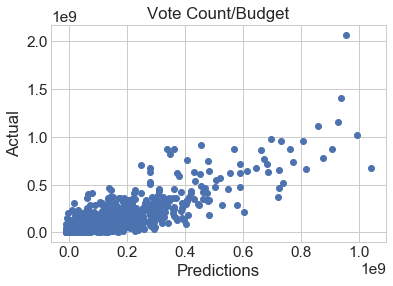

In [89]:
#Plot
plt.scatter(predictions_it, it_y_test)
plt.title("Vote Count/Budget")
plt.xlabel("Predictions")
plt.ylabel("Actual")

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(it_y_test, predictions_it))  
print('Mean Squared Error:', metrics.mean_squared_error(it_y_test, predictions_it))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(it_y_test, predictions_it)))

Mean Absolute Error: 38264438.617332384
Mean Squared Error: 5219169105267025.0
Root Mean Squared Error: 72243817.07293037


In [91]:
lm_it = sm.OLS(it_y_train, it_X_train)
lm_it_results = lm_it.fit()
print(lm_it_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     8211.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:55:11   Log-Likelihood:                -98779.
No. Observations:                5033   AIC:                         1.976e+05
Df Residuals:                    5031   BIC:                         1.976e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Vote Count  6.956e+04   1298.381     53.576      0.0